In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import keras
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
    


In [2]:
# making dataframe  
covid = pd.read_csv(r'C:\Users\peter\OneDrive\Documents\Advanced Data Science with IBM Specialization\Advanced Data Science Capstone\COVID-19_Case_Surveillance_Public_Use_Data.csv')  


C:\Users\peter\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
covid.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/23,2020/03/31,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,2020/03/22,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,2020/03/22,2020/03/22,2020/03/23,2020/03/22,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
3,2020/03/23,2020/03/23,2020/03/23,2020/03/23,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No
4,2020/03/23,2020/03/23,2020/03/23,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


In [4]:
covid.shape

(13415836, 12)

In [5]:
covid.describe()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
count,13415836,12207685,4152691,6239439,13415836,13415824,13415770,13415824,13415836,13415836,13415836,13415836
unique,351,363,351,365,2,5,10,9,4,4,4,4
top,2020/12/08,2020/12/14,2020/11/30,2020/11/30,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
freq,227886,234449,75507,67187,12537876,6920504,2567606,5175054,5741709,10486098,6197962,10242673


In [6]:
covid = covid.astype(np.str)

### We will drop the first 4 columns because we will not use any dates

In [7]:
covid = covid.drop(covid.columns[[0,1,2,3]], axis=1)

In [8]:
covid.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
1,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,Unknown,Unknown,Unknown
2,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
3,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,No,No
4,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Unknown,Unknown,Unknown,Unknown


In order to replace missing data values, we replace "Unknown" and "Missing" with NaN

In [9]:
covid = covid.replace('Unknown', np.nan)
covid = covid.replace('Missing', np.nan)
covid.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Female,0 - 9 Years,"Black, Non-Hispanic",NaN,NaN,NaN,NaN
1,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Yes,NaN,NaN,NaN
2,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
3,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,NaN,No,No
4,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,NaN,NaN,NaN,NaN


Now, we drop all NaN's and we have our Dataframe

In [10]:
covid_etl = covid.dropna(axis = 0)
covid_etl.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
2,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
34,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,Yes,No,No,No
35,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,No,No,No,No
61,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",Yes,No,No,Yes
64,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,No,No,No


In [11]:
covid_etl.shape

(565211, 8)

We have removed alot of data but, we still have over half a million values

## We will begin to explore the data by plotting some bar graphs

In [12]:
import seaborn as sns

#### First, let's examine the counts on race/ethnicity

In [13]:
race_ethnicity_combined_count = pd.DataFrame(covid_etl.race_ethnicity_combined.value_counts())

print(race_ethnicity_combined_count)

                                                    race_ethnicity_combined
White, Non-Hispanic                                                  345875
Hispanic/Latino                                                      113284
Black, Non-Hispanic                                                   67146
Multiple/Other, Non-Hispanic                                          18160
Asian, Non-Hispanic                                                   15841
Native Hawaiian/Other Pacific Islander, Non-His...                     3002
American Indian/Alaska Native, Non-Hispanic                            1898
nan                                                                       5


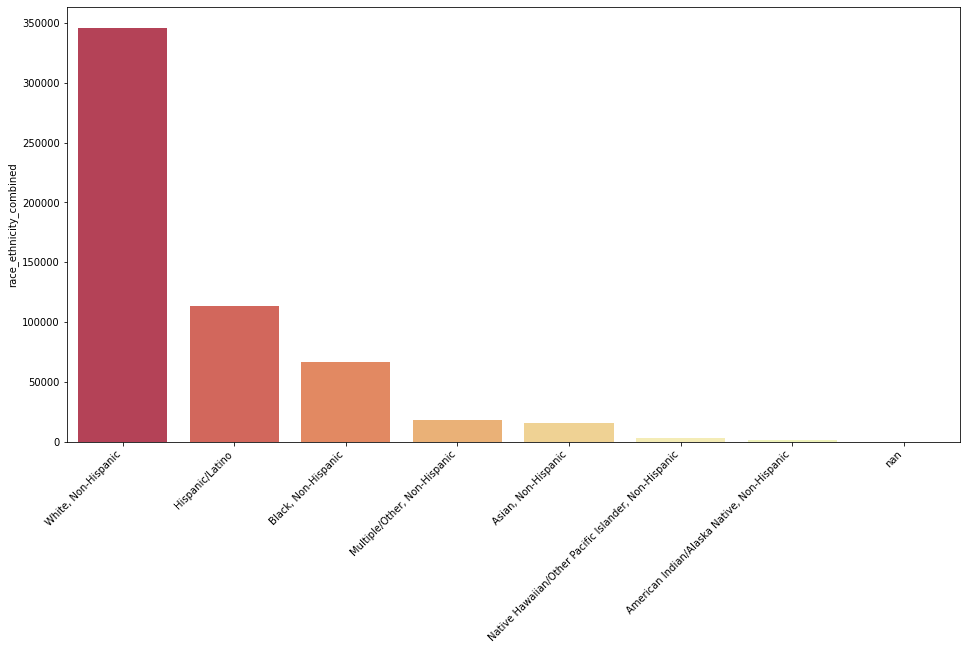

In [14]:
plt.figure(figsize=(16,8))
chart = sns.barplot(race_ethnicity_combined_count.index, race_ethnicity_combined_count.race_ethnicity_combined, palette=sns.color_palette("Spectral", n_colors=len(race_ethnicity_combined_count) + 4))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### Next, let's examine the counts on gender/sex

In [15]:
sex_count = pd.DataFrame(covid_etl.sex.value_counts())

print(sex_count)

           sex
Female  302803
Male    262321
Other       82
nan          5


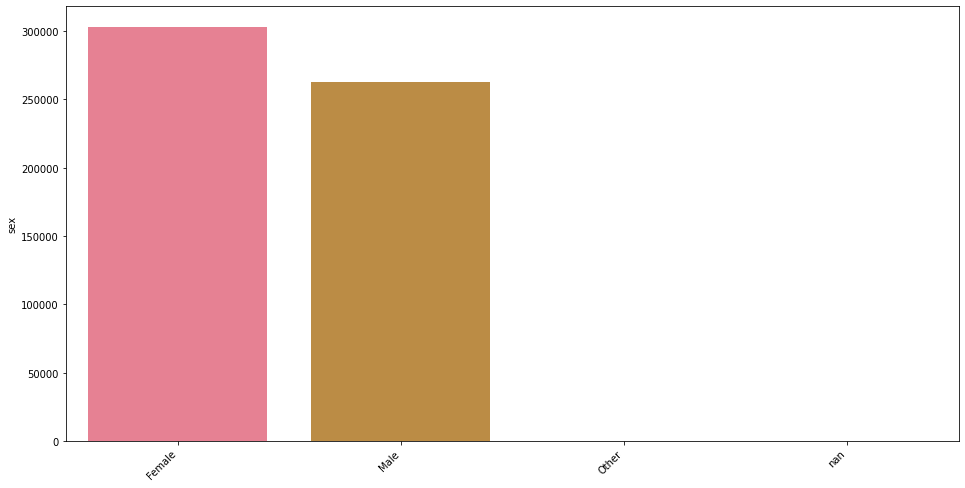

In [16]:
plt.figure(figsize=(16,8))
chart = sns.barplot(sex_count.index, sex_count.sex, palette=sns.color_palette("husl", 8))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### Finally, let's examine age groups

In [17]:
age_group_count = pd.DataFrame(covid_etl.age_group.value_counts())

print(age_group_count)

               age_group
20 - 29 Years      96059
50 - 59 Years      85775
30 - 39 Years      82034
40 - 49 Years      81317
60 - 69 Years      69188
10 - 19 Years      55872
70 - 79 Years      43820
80+ Years          32102
0 - 9 Years        19020
nan                   24


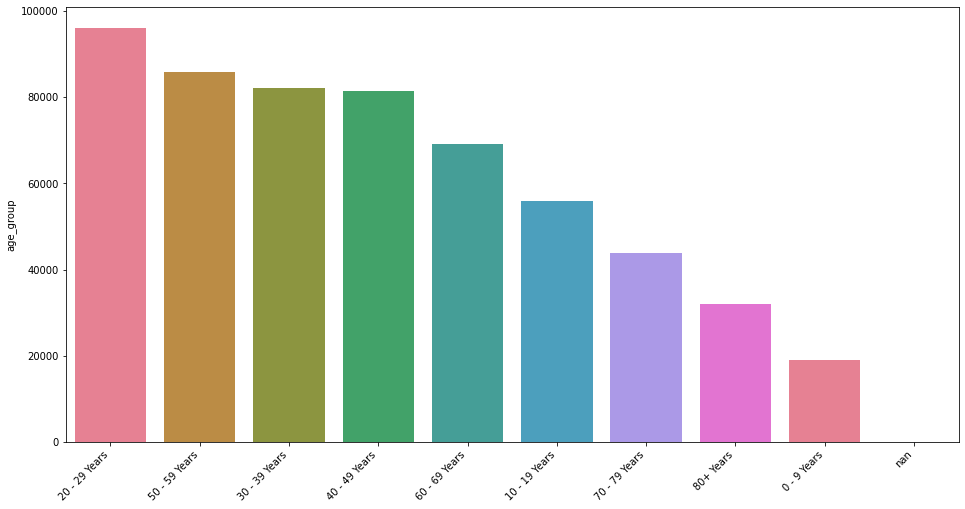

In [18]:
plt.figure(figsize=(16,8))
chart = sns.barplot(age_group_count.index, age_group_count.age_group, palette=sns.color_palette("husl", 8))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## We see the majority of Covid case are in the "White, non-Hispanic" group. We do not notice any difference in Gender or age groups.

Now, we move the "death_yn" column to the last column because this is the label that we will predict.

In [19]:
col_name='death_yn'
last_col = covid_etl.pop(col_name)
covid_etl.insert(7, col_name, last_col)
covid_etl.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,medcond_yn,death_yn
2,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,No,No,No
34,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,Yes,No,No,No
35,Laboratory-confirmed case,Male,0 - 9 Years,Hispanic/Latino,No,No,No,No
61,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",Yes,No,Yes,No
64,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,No,No,No


In [20]:
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
# retrieve numpy array
    dataset = filename.values
# split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
# format all fields as string
    X = X.astype(str)
# reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    return X, y

In [21]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [22]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [187]:
# load the dataset
X, y = load_dataset(covid_etl)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [40]:
# define the  model
model = Sequential()
model.add(Dense(10, input_dim=len(X_train_enc[1]), activation='sigmoid'))
model.add(Dense(6))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
loss_dict = ['binary_crossentropy', 'categorical_crossentropy', 'mean_squared_error']
optimizer_dict = ['adam', 'SGD', 'Adadelta']
for ld in loss_dict:
   for opt in optimizer_dict:
    model.compile(loss= ld, optimizer= opt, metrics=['accuracy'])
# fit the keras model on the dataset
    model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=16, verbose=0)
# evaluate the keras model
    _, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
    print('Accuracy: %.2f' % (accuracy*100), "for ", ld, "With ", opt)

Accuracy: 95.51 for  binary_crossentropy With  adam
Accuracy: 95.52 for  binary_crossentropy With  SGD
Accuracy: 95.53 for  binary_crossentropy With  Adadelta
Accuracy: 95.53 for  categorical_crossentropy With  adam
Accuracy: 95.53 for  categorical_crossentropy With  SGD
Accuracy: 95.53 for  categorical_crossentropy With  Adadelta
Accuracy: 95.52 for  mean_squared_error With  adam
Accuracy: 95.51 for  mean_squared_error With  SGD
Accuracy: 95.51 for  mean_squared_error With  Adadelta


## We notice the accuracy is almost the same for the different loss measures and the different optimizers.

# We will now try a non-deep learning model, Machine Learning using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [188]:
LR = LogisticRegression()
LR.fit(X_train_enc, y_train_enc)
predictions = LR.predict(X_test_enc)
# Use score method to get accuracy of model
score = LR.score(X_test_enc, y_test_enc)
print('Accuracy is: ', score)

Accuracy is:  0.9544606476517263


### Now we will examine the Confusion matrix and a graphical representation of it

In [47]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test_enc, predictions)
print(cm)

[[173496   2330]
 [  6164   4530]]


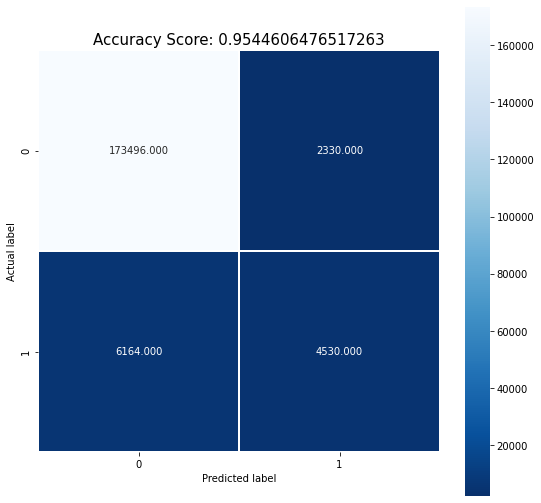

In [48]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [78]:
import matplotlib.pyplot as plt

## Let's check Feature Importance

In [177]:
# get importance
importance = LR.coef_
importance = pd.DataFrame(importance)
# summarize feature importance
i = 0
df = pd.DataFrame(columns=['Feature', 'Importance'])
#df = pd.DataFrame()
for (columnName) in covid_etl: 
    if (i < 7):
        print('Column Name : ', columnName, '--Importance : ', importance.iloc[0,i])
        df = df.append({'Feature': columnName, 'Importance': importance.iloc[0,i]}, ignore_index=True)
        i = i + 1
        

Column Name :  current_status --Importance :  -0.1288877832236817
Column Name :  sex --Importance :  0.2539809386475376
Column Name :  age_group --Importance :  0.7693129001355521
Column Name :  race_ethnicity_combined --Importance :  -0.09303809605892784
Column Name :  hosp_yn --Importance :  1.8104970886853478
Column Name :  icu_yn --Importance :  2.170398594674539
Column Name :  medcond_yn --Importance :  1.069098901755967


In [176]:
df.head()

,Feature,Importance
0,current_status,-0.128888
1,sex,0.253981
2,age_group,0.769313
3,race_ethnicity_combined,-0.093038
4,hosp_yn,1.810497


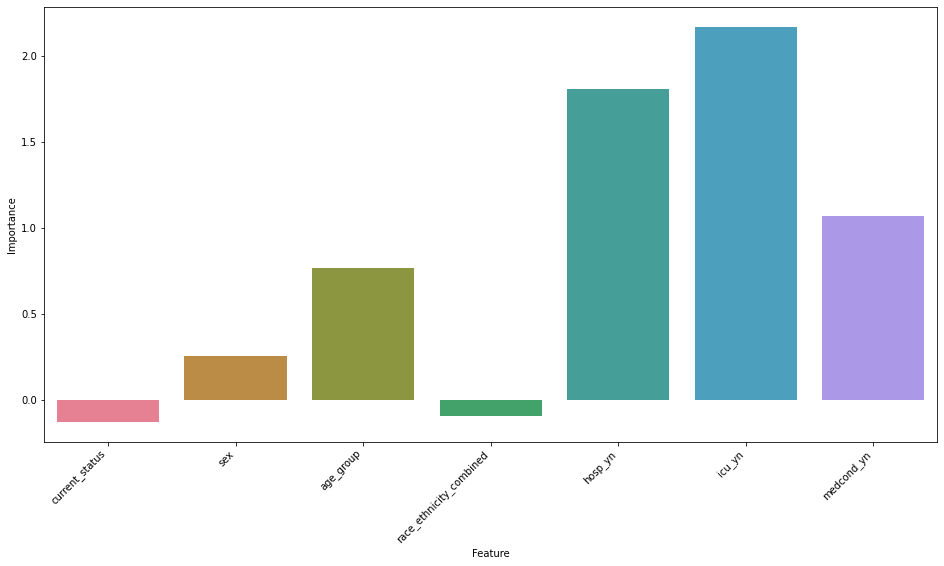

In [178]:
plt.figure(figsize=(16,8))
chart = sns.barplot(df.Feature, df.Importance, palette=sns.color_palette("husl", 8))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### We see the most important features are Age, Hopitalized, Icu, Medical Condition
#### So, we will drop the other 3 categories and re-run Logistic Regression

In [179]:
main_features = covid_etl.drop(covid_etl.columns[[0,1,3]], axis=1)
main_features.head()

,age_group,hosp_yn,icu_yn,medcond_yn,death_yn
2,0 - 9 Years,No,No,No,No
34,0 - 9 Years,Yes,No,No,No
35,0 - 9 Years,No,No,No,No
61,0 - 9 Years,Yes,No,Yes,No
64,0 - 9 Years,No,No,No,No


In [180]:
# load the dataset
X, y = load_dataset(main_features)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
LR = LogisticRegression()
LR.fit(X_train_enc, y_train_enc)
predictions = LR.predict(X_test_enc)
# Use score method to get accuracy of model
score = LR.score(X_test_enc, y_test_enc)
print(score)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9544338408749732


### The acuracy does not change by a significant amount

# Conclusion: All models/techniques perform extremely good with accuracy over 95%